<a href="https://colab.research.google.com/github/nxshi/IDS131F21/blob/main/ProblemSets/2a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
import os
import glob

import pandas as pd
import numpy as np
from random import randint
import seaborn as sns

import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import norm

In [ ]:
from google.colab import drive
MOUNTPOINT = '/content/gdrive'
drive.mount(MOUNTPOINT)

Mounted at /content/gdrive


In [ ]:
DATADIR = os.path.join(MOUNTPOINT, 'My Drive', 'ps2')

#**Problem 2.1**

## 2.1a

In [ ]:
os.chdir(DATADIR)

In [ ]:
column_names = ['X_chr_loc', 'Y_chr_loc', 'Interaction_freq']

log_int_freq_list = []
total_should_be_rows = 0

for file in filenames:
    #read multiple text files tab seperated and add column names and name data frame
    df_a = pd.read_csv(file, sep = "\t", names=column_names)  
    df_a.index.name = file
    
    #Divide by 250000 for data resolution and create log int freq column
    df_a['X_chr_loc'] = df_a['X_chr_loc'] / 250000
    df_a['Y_chr_loc'] = df_a['Y_chr_loc'] / 250000
    df_a['log(1 + int_freq)'] = np.log(1 + df_a['Interaction_freq'])

    log_int_freq = np.array(df_a['log(1 + int_freq)'])

    log_int_freq[np.isnan(log_int_freq)] = 0
    log_int_freq_list.append(log_int_freq)
    
    maxX = max(df_a['X_chr_loc'])
    maxY = max(df_a['Y_chr_loc'])

    total_should_be_rows += maxY * maxX
    
N = total_should_be_rows
log_int_freq_np = np.array(log_int_freq_list)

print(N)

62599838.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
log_int_freq_total = 0

for i in log_int_freq_np:
       
    log_int_freq_total += np.sum(i)
    
mean_log_int_freq = log_int_freq_total / N

In [ ]:
std_sum = 0
counter = 0
for i in log_int_freq_np:
    
    for j in i:
        
        std_sum += ((mean_log_int_freq - j)**2)
        #print((mean_log_int_freq - j))
        #print(std_sum)
        counter += 1
        
std_sum += (N - counter) * (mean_log_int_freq**2)
        
std = np.sqrt(std_sum / N)
print(std_sum)
print(N)
print(mean_log_int_freq)
std_log_int_freq = std
print(std)            

25111837.77954773
62599838.0
0.7046520029216686
0.6333629342482747


## 2.1b

In [ ]:
column_names = ['X_chr_loc', 'Y_chr_loc', 'Interaction_freq']

df_19_20 = pd.read_csv('/content/gdrive/MyDrive/hic_part1/chr19_chr20.txt', delimiter = "\t", names=column_names)

# The resolution of this data is 250kb, so the locations are all multiples of 250k. Hint: You should divide all of the locations by 250k to build your matrices.
df_19_20['log(int_freq)'] = np.log(1 + df_19_20['Interaction_freq'])

df_19_20['X_chr_loc'] = df_19_20['X_chr_loc'] / 250000
df_19_20['Y_chr_loc'] = df_19_20['Y_chr_loc'] / 250000

maxX = max(df_19_20['X_chr_loc'])
maxY = max(df_19_20['Y_chr_loc'])

int_freq_mean = df_19_20['log(int_freq)'].mean()
int_freq_sd = df_19_20['log(int_freq)'].std()

print(df_19_20)

       X_chr_loc  Y_chr_loc  Interaction_freq  log(int_freq)
0            1.0        0.0         13.648587       2.684344
1            2.0        0.0          1.769289       1.018591
2            4.0        0.0          1.461945       0.900952
3            5.0        0.0          1.918623       1.071112
4            6.0        0.0          1.152198       0.766489
...          ...        ...               ...            ...
50026      232.0      251.0          2.172153       1.154411
50027      233.0      251.0          2.270645       1.184987
50028      234.0      251.0          0.814202       0.595646
50029      235.0      251.0          4.334248       1.674148
50030      236.0      251.0         15.323350       2.792597

[50031 rows x 4 columns]


In [ ]:
sns.set(rc={'figure.figsize':(20,20)})

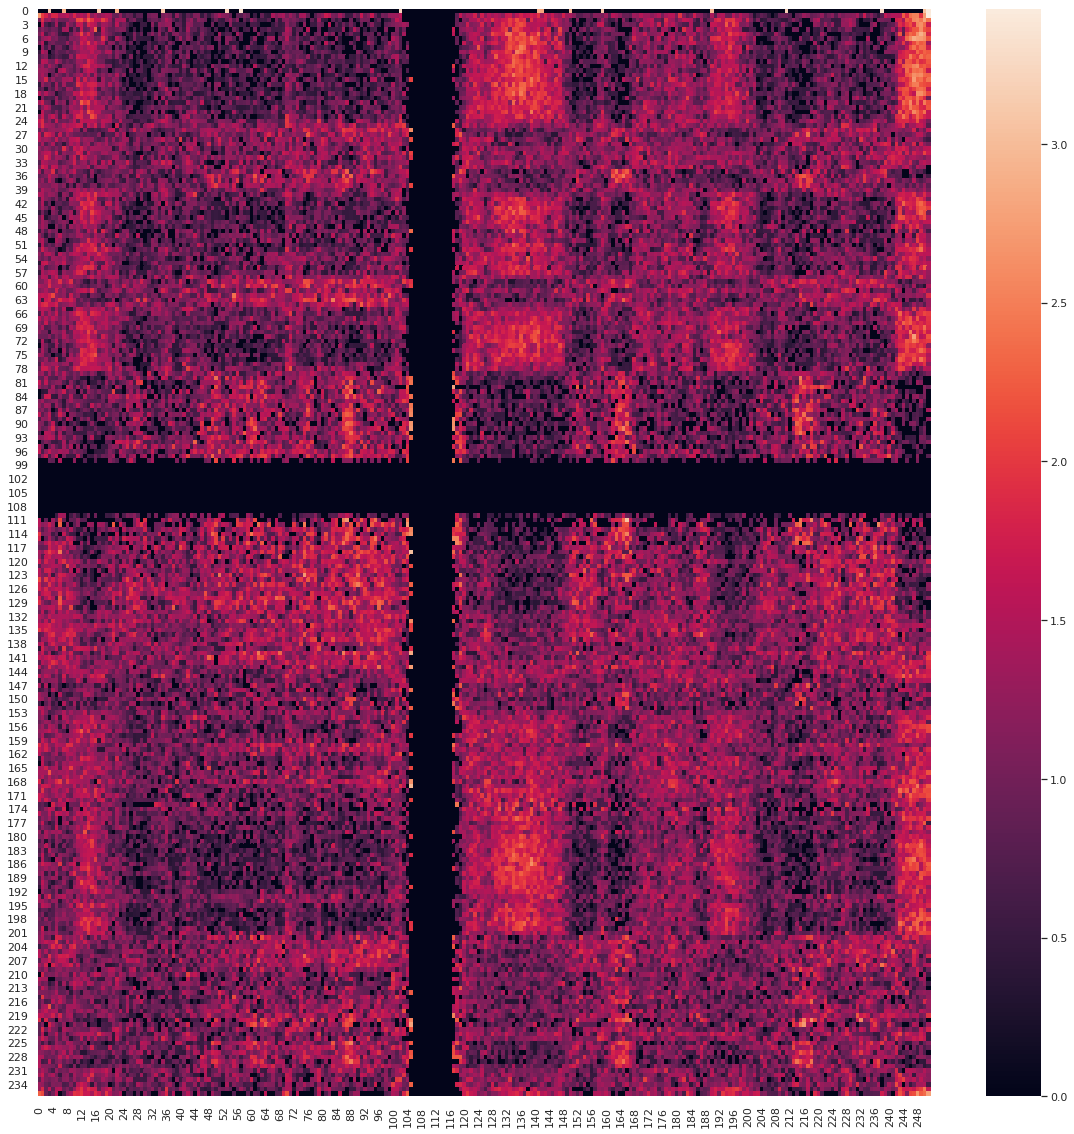

In [ ]:
from scipy import sparse
d = df_19_20.to_numpy()
test=sparse.coo_matrix((d[:,3], (d[:,0], d[:,1])), ...
          shape = (max(d[:,0]).astype(int)+1, max(d[:,1]).astype(int)+1) ).toarray()

ax = sns.heatmap(test)
plt.show()

In [ ]:
np.isnan(test).any()

False

## 2.1c

In [ ]:
column_names = ['X_chr_loc', 'Y_chr_loc', 'Interaction_freq']

df_19_20 = pd.read_csv('/content/gdrive/MyDrive/hic_part1/chr19_chr20.txt', delimiter = "\t", names=column_names)

# The resolution of this data is 250kb, so the locations are all multiples of 250k. Hint: You should divide all of the locations by 250k to build your matrices.
df_19_20['log(int_freq)'] = np.log(1 + df_19_20['Interaction_freq'])

df_19_20['X_chr_loc'] = df_19_20['X_chr_loc'] / 250000
df_19_20['Y_chr_loc'] = df_19_20['Y_chr_loc'] / 250000

maxX = max(df_19_20['X_chr_loc'])
maxY = max(df_19_20['Y_chr_loc'])

int_freq_mean = mean_log_int_freq
int_freq_sd = std_log_int_freq



In [ ]:
mu = 0.7046520029216686
std = 0.6333629342482824

def Nsubmatrices(a,b,k,l):
    N = (a - l + 1)*(b - k + 1)
    return N

def adj_pvalue(m, a, b, k, l):
    pdf = ((m-mu) * np.sqrt(k*l)) / std
    adj_pvalue = Nsubmatrices(a,b,k,l) * (norm.sf(pdf))
    return adj_pvalue

#def random_entry(M):

#    random_row_index = np.random.random_integers(0, M.shape[0])
#    random_col_index = np.random.random_integers(0, M.shape[1])
#    return random_row_index, random_col_index

##2.1d

In [ ]:
def greedy_search(M):
    
    # Random start
    r = randint(0,M.shape[0]-1)
    c = randint(0,M.shape[1]-1)
    
    # submatrix defined and updated by its boundries
    top = r
    bottom = r + 1
    left = c
    right = c + 1
    
    #Size of the whole space
    a = M.shape[0]
    b = M.shape[1]

    #Size of the initial submatrix
    k = 1
    l = 1
    
    while True: #The break conditions are inside
    ## We 

        MM = M[top:bottom, left:right]
        MM_mean = MM.mean()
        pvalue = adj_pvalue(MM_mean, a, b, k, l)
        X = 0
        p_min = pvalue
         
        if top > 0:   #We make sure we can grow in this direction
          MMup = M[top-1:bottom, left:right]  #define our new submatrix
          pvalueup = adj_pvalue(MMup.mean(), a, b, k+1, l)  #get its pvalue
          if pvalueup < p_min:  #Test if this is lower than our current minimum
            X = 1               #Update the direction we should go
            p_min = pvalueup    #Update our current minimum pvalue 
        
        #And we repeat the same logic for the other 3 directions
        if bottom < b:
          MMdown = M[top:bottom+1, left:right]
          pvaluedown = adj_pvalue(MMdown.mean(), a, b,  k+1, l)
          if pvaluedown < p_min: 
            X = 2
            p_min = pvaluedown
     
        if left > 0:
          MMleft = M[top:bottom, left-1:right]
          pvalueleft = adj_pvalue(MMleft.mean(), a, b, k, l+1)
          if pvalueleft < p_min: 
            X = 3
            p_min = pvalueleft
    
        if right < a:
          MMright = M[top:bottom, left:right+1]
          pvalueright = adj_pvalue(MMright.mean(), a, b, k, l+1)
          if pvalueright < p_min: 
            X = 4
            p_min = pvalueright


        if X == 0:  # No growing direction would decrease p_value 
            break   # Stop growing

        if X == 1:  # if Up is the direction to grow
            top -= 1  # Update the boundies of our submatix (grow)
            k += 1    # Change the appropiate lenght size of our submatrix
            pvalue = pvalueup # Update the pvalue of our submatrix 

        if X == 2:
            bottom += 1
            k += 1
            pvalue = pvaluedown

        if X == 4:
            right += 1
            l += 1
            pvalue = pvalueright

        if X == 3:
            left -= 1
            l += 1
            pvalue = pvalueleft
    
    return top, bottom, right, left, pvalue, MM_mean

In [ ]:
greedy_search(test)

(232, 233, 117, 116, 51783.724563851465, 0.0)

In [ ]:
#greedy_search(array_19_20)

In [ ]:
test_saved = test.copy()
Z = test.copy()
list_of_Zs = [Z]
for z in range(20):
  min_p_value_threshold = 0.01
  gr_min = []
  for i in range(100):
      gr_test = greedy_search(np.asmatrix(Z))
      if gr_test[4] <= min_p_value_threshold:
        min_p_value_threshold = gr_test[4]
        gr_min = gr_test
  top, bottom, right, left, min_p_value, MM_mean = gr_min
  Z[top:bottom, left:right] -= MM_mean
  list_of_Zs.append(Z.copy())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. Please call randint(0, 237 + 1) instead
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: This function is deprecated. Please call randint(0, 252 + 1) instead
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/numpy/matrixlib/defmatrix.py:445: RuntimeWarning: Mean of empty slice.
  return N.ndarray.mean(self, axis, dtype, out, keepdims=True)._collapse(axis)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


In [ ]:
z_num = test.copy()
num_interactions = np.zeros(z_num.shape)
count = []
for i in range(2000):
    gr_test = greedy_search(np.asmatrix(z_num))
    count.append(0)
    if gr_test[4] <= 0.01:
      top, bottom, right, left, min_p_value, MM_mean = gr_test
      num_interactions[top:bottom,left:right] = 1
    count[i] = np.sum(num_interactions)
n_int_total = np.sum(num_interactions)
plt.plot(count)
print(n_int_total)

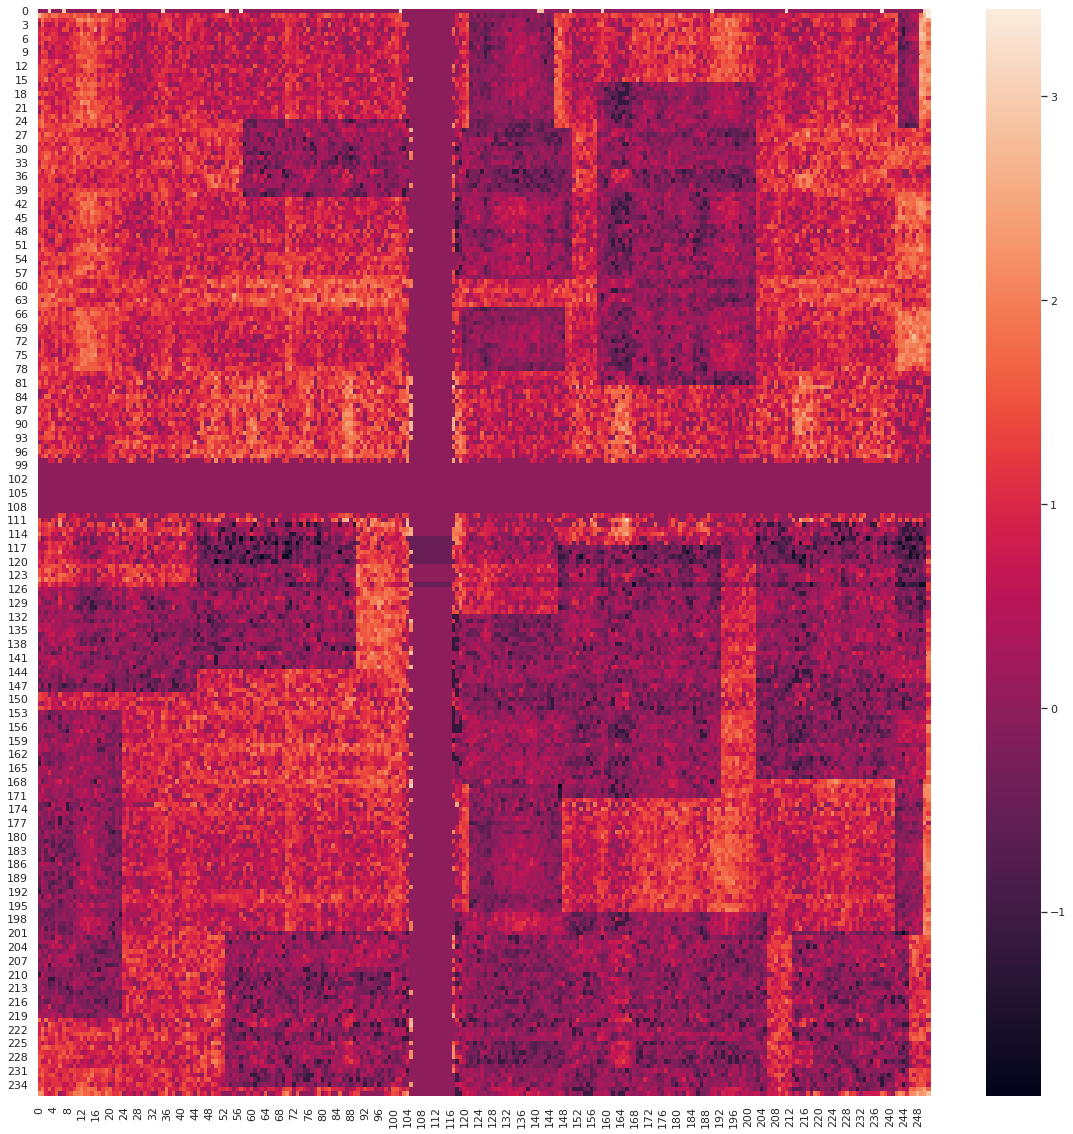

In [ ]:
ax1 = sns.heatmap(list_of_Zs[-1])
plt.show()

In [ ]:
largelistofZs = list_of_Zs.copy()

In [ ]:
results_save = list_of_Zs.copy()
ax = sns.heatmap(results_save[-3])
plt.show()

NameError: ignored

In [ ]:
top, bottom, right, left, min_p_value, MM_mean = gr_min
Z = test.copy()
Z[top:bottom, left:right] -= MM_mean

ax = sns.heatmap(Z)
plt.show()

##2.1e

In [ ]:
from scipy import sparse
df_a = pd.read_csv('/content/gdrive/MyDrive/hic_part1/chr19_chr20.txt', sep = "\t", names=column_names)  
df_a.index.name = '19, 20'

#Divide by 250000 for data resolution and create log int freq column
df_a['X_chr_loc'] = df_a['X_chr_loc'] / 250000
df_a['Y_chr_loc'] = df_a['Y_chr_loc'] / 250000
df_a['Interaction_freq'] = np.log(1 + df_a['Interaction_freq']).fillna(0)

df_a = df_a.to_numpy()

#######
df_a = sparse.coo_matrix((df_a[:,2], (df_a[:,0], df_a[:,1])), shape = (max(df_a[:,0]).astype(int)+1, max(df_a[:,1]).astype(int)+1) ).toarray()
print(df_a)


[[0.         0.         0.         ... 0.         3.04331218 3.40209844]
 [2.68434388 2.02781977 1.80783136 ... 1.96189935 2.70286384 3.42477598]
 [1.01859064 1.90235172 1.26451767 ... 2.45677566 2.80395832 2.41991985]
 ...
 [1.33821398 1.26662296 0.92219069 ... 1.39319326 1.47286113 0.59564554]
 [1.30108486 1.87056048 0.93056666 ... 2.06780282 2.45547758 1.67414792]
 [2.28452977 2.11970504 0.94926443 ... 2.25624928 2.36704789 2.7925966 ]]


In [ ]:
final_M = np.zeros((22,22))
column_names = ['X_chr_loc', 'Y_chr_loc', 'Interaction_freq']

In [ ]:
filenames

['chr11_chr21.txt',
 'chr17_chr18.txt',
 'chr13_chr17.txt',
 'chr16_chr22.txt',
 'chr11_chr19.txt',
 'chr10_chr12.txt',
 'chr12_chr17.txt',
 'chr15_chr20.txt',
 'chr11_chr16.txt',
 'chr10_chr16.txt',
 'chr10_chr21.txt',
 'chr15_chr16.txt',
 'chr14_chr20.txt',
 'chr10_chr14.txt',
 'chr14_chr21.txt',
 'chr10_chr18.txt',
 'chr15_chr17.txt',
 'chr17_chr21.txt',
 'chr11_chr13.txt',
 'chr16_chr17.txt',
 'chr14_chr15.txt',
 'chr18_chr22.txt',
 'chr10_chr13.txt',
 'chr16_chr20.txt',
 'chr12_chr13.txt',
 'chr12_chr15.txt',
 'chr16_chr18.txt',
 'chr12_chr20.txt',
 'chr15_chr22.txt',
 'chr13_chr22.txt',
 'chr14_chr18.txt',
 'chr15_chr18.txt',
 'chr12_chr16.txt',
 'chr19_chr21.txt',
 'chr17_chr20.txt',
 'chr10_chr20.txt',
 'chr18_chr21.txt',
 'chr10_chr17.txt',
 'chr12_chr14.txt',
 'chr11_chr14.txt',
 'chr11_chr17.txt',
 'chr12_chr22.txt',
 'chr13_chr19.txt',
 'chr14_chr22.txt',
 'chr11_chr20.txt',
 'chr10_chr19.txt',
 'chr16_chr19.txt',
 'chr13_chr15.txt',
 'chr10_chr22.txt',
 'chr11_chr18.txt',


In [ ]:
from scipy import sparse
for file in filenames:
    df_a = pd.read_csv(file, sep = "\t", names=column_names)  #Read the text file (not ordered)
    # Extact the chromosomes numbers
    chroms = file.split('_chr') 
    chr_1 = int(chroms[0].split('chr')[-1])
    chr_2 = int(chroms[1].split('.')[0])
    print(chr_1, chr_2)
    # Divide by 250000 for data resolution and calculate log int freq
    df_a['X_chr_loc'] = df_a['X_chr_loc'] / 250000
    df_a['Y_chr_loc'] = df_a['Y_chr_loc'] / 250000
    df_a['Interaction_freq'] = np.log(1 + df_a['Interaction_freq']).fillna(0)
    df_a = df_a.to_numpy()
    # Create a sparce matrix out of our dense matrix (add 0s and pivot)
    # df_a = sparse.coo_matrix((df_a[:,2], (df_a[:,0], df_a[:,1])), shape = (max(df_a[:,0]).astype(int)+1, max(df_a[:,1]).astype(int)+1) ).toarray()

    # Initize our interaction counter matrix with 0s
    num_interactions = np.zeros(df_a.shape)

    # Hundred of Greedy searchs run to each interaction matrix
    for i in range(300):
      gr_test = greedy_search(np.asmatrix(df_a))
      if gr_test[4] <= 0.01:  # P_value threshold for high interaciton regions
        top, bottom, right, left, min_p_value, MM_mean = gr_test
        num_interactions[top:bottom,left:right] = 1  # genes within these regions
    
    n_int_total = np.sum(num_interactions) # Sum the total
    print(n_int_total)

    final_M[chr_1-1,chr_2-1] = n_int_total # Fill our counter matrix at the corresponding cell
    final_M[chr_2-1,chr_1-1] = n_int_total # And its mirrored duplicate (1-2/2-1)

11 21
17 18
13 17
16 22
11 19
10 12
12 17
15 20
11 16
10 16
10 21
15 16
14 20
10 14
14 21
10 18
15 17
17 21
11 13
16 17
14 15
18 22
10 13
16 20
12 13
12 15
16 18
12 20
15 22
13 22
14 18
15 18
12 16
19 21
17 20
10 20
18 21
10 17
12 14
11 14
11 17
12 22
13 19
14 22
11 20
10 19
16 19
13 15
10 22
11 18
19 22
17 22
12 21
14 19
10 15
11 12
11 15
13 21
14 16
13 14
13 20
17 19
12 19
19 20
12 18
14 17
11 22
15 21
16 21
10 11
15 19
13 18
13 16
18 20
18 19
1 10
1 11
1 12
1 13
1 14
1 16
1 18
1 17
1 15
1 19
1 21
1 22
1 20
1 3
1 2
1 4
1 5
1 6
1 7
21 22
1 8
20 21
1 9
20 22
2 10
2 12
2 11
2 13
2 14
2 16
2 15
2 18
2 17
2 19
2 20
2 21
2 22
2 3
2 4
2 5
2 6
2 7
2 8
2 9
3 11
3 10
3 12
3 14
3 15
3 16
3 13
3 22
3 18
3 19
3 17
3 20
3 21
3 4
3 5
3 7
3 6
3 9
3 8
4 10
4 13
4 11
4 12
4 14
4 16
4 15
4 17
4 19
4 20
4 18
4 22
4 21
4 5
4 7
4 6
4 8
4 9
5 11
5 10
5 13
5 12
5 15
5 14
5 16
5 17
5 18
5 20
5 19
5 22
5 21
5 6
5 8
5 7
5 9
6 10
6 13
6 11
6 14
6 12
6 17
6 16
6 15
6 18
6 21
6 20
6 19
6 22
6 7
6 8
6 9
7 10
7 11


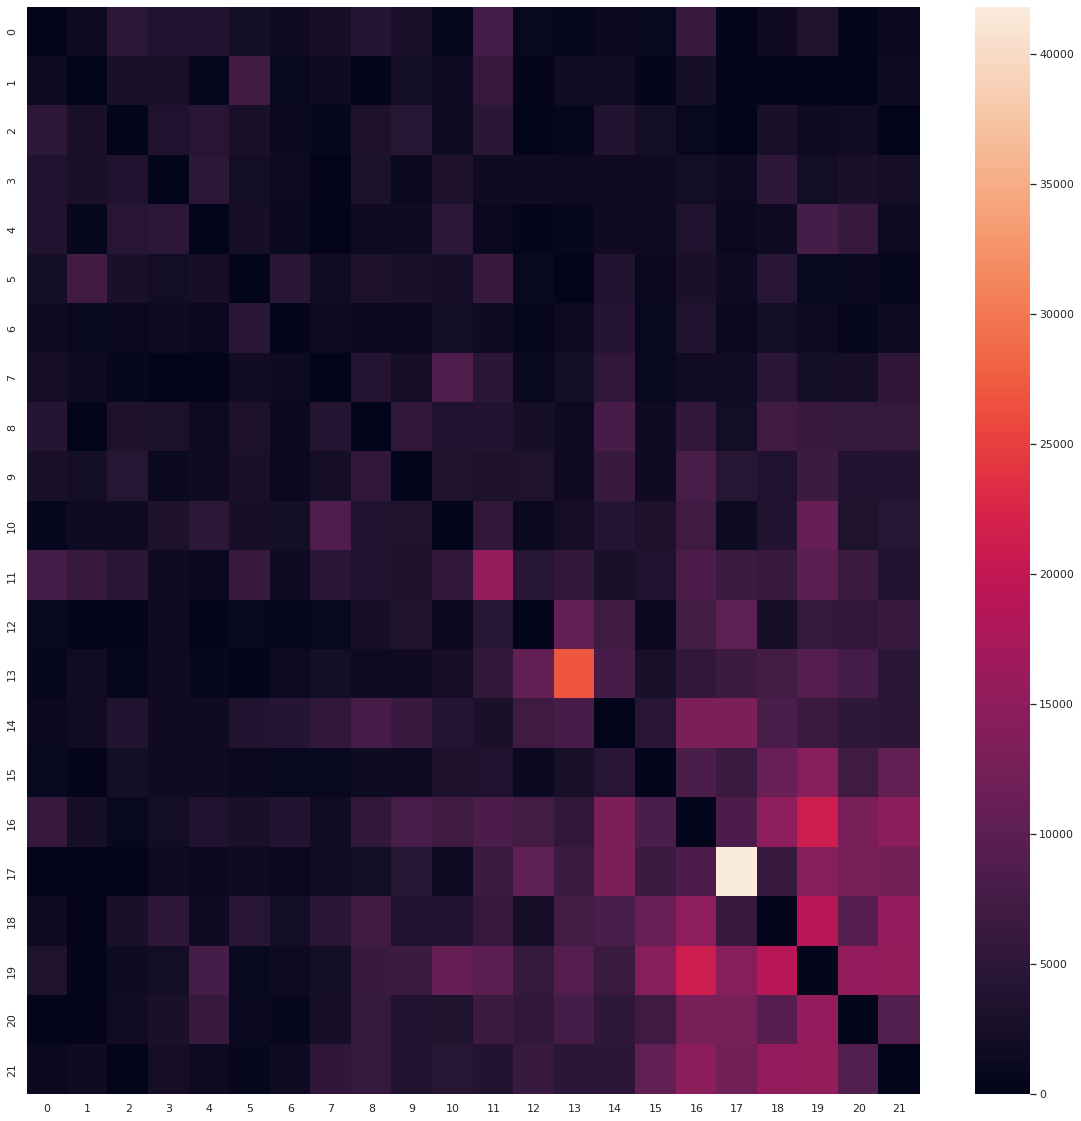

In [ ]:
ax = sns.heatmap(final_M)
plt.show()

##2.1f

In [ ]:
G = np.zeros(final_M.shape)

#transform data
for i in range(len(G)):
  for j in range(len(G)):
    G[i,j] = np.exp((-1*final_m[i,j]/1000))

from sklear.manifold import MDS

NameError: ignored

# **Problem 2.2**

In [ ]:
from numpy.linalg import inv

synx = np.loadtxt("/content/gdrive/MyDrive/ps1/syn_X.csv", delimiter=',')
syny = np.loadtxt("/content/gdrive/MyDrive/ps1/syn_y.csv", delimiter=',')
X = np.asmatrix(synx)
X = np.c_[np.ones((100,1)),X]
y = np.asmatrix(syny)
y = y.transpose()
B = np.matmul((inv(np.matmul(X.transpose(),X))),(np.matmul( X.transpose() , y)))
b_hat = [float(x) for x in B]
b_hat

[1.9296060273046032, 1.2639709635322953, -4.597993305903085]

In [ ]:
from sklearn.linear_model import LogisticRegression

#clf = LogisticRegression(penalty ='none').fit(X, y)
